Some conventions:

"Standard" mass plots are with: M3 = MQ3 = MU3 = 1 TeV, AU3 = AD3 = AE3 = 2.5 TeV

Modifications to exp. constraints: now also require $\Delta a_{\mu} > 0$ and $\Omega h^2 < 0.131$ 

"Default Higgs mass" - default Higgs mass calculation (I4 = 0)

"Full 1+2" - Higgs mass has full 1+2 loop corrections (I4 = 1)

From Ulrich's NMSSM paper, p12, eq 2.36, the top squark tree-level mass matrix in the basis $(\tilde{t}_R, \tilde{t}_L)$ is: (noting that it is symmetric)

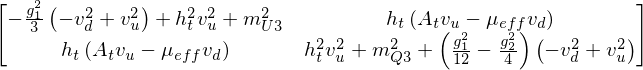

In [1]:
from sympy import *
init_printing(use_latex=True, wrap_line=True)

# Mass matrix in basis (~tR,~tL)
mu3 = Symbol('m_{U_3}')
ht = Symbol('h_t')
vu = Symbol('v_u')
vd = Symbol('v_d')
g1 = Symbol('g_1')
g2 = Symbol('g_2')
At = Symbol('A_t')
mueff = Symbol('mu_eff')
mq3 = Symbol('m_{Q_3}')

m = Matrix([[mu3**2 +(ht**2*vu**2) - ((vu**2 - vd**2)*g1**2*Rational(1,3)), ht*(At*vu - mueff*vd)], 
            [ht*(At*vu - mueff*vd), mq3**2 + ht**2*vu**2 + (vu**2 - vd**2)*(g1**2*Rational(1,12) - g2**2*Rational(1,4))]])
m

We can diagonalise it to get the masses of $\tilde{t}_1, \tilde{t}_2$:

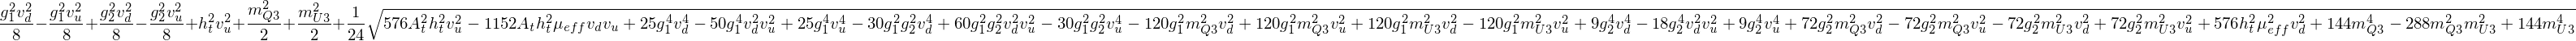

In [2]:
m.eigenvals().keys()[0]

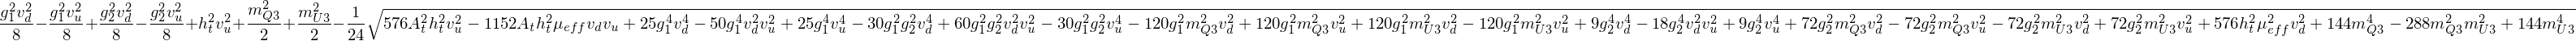

In [3]:
m.eigenvals().keys()[1]

So the mass difference $m_{\tilde{t_1}} - m_{\tilde{t_2}}$ is purely from the square root term.

Note that once we include the two-loop corrections, things get considerably more complicated (see Appendix B.4). There is now a far more complicated dependence, with extra contributions from $M_{1,2,3}, A_{t,b,\tau, \lambda}, m_{H_{u}, H_{d}}, \lambda, h_b \dotsm $

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from itertools import izip

# to show plots:
get_ipython().magic(u'pylab inline')

%load_ext autoreload
%autoreload 2

mpl.rcParams['figure.figsize'] = (9.0, 6.0)  # default size of plots
mpl.rcParams['axes.labelsize'] = 30
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
mpl.rcParams['xtick.major.size'] = 10
mpl.rcParams['ytick.major.size'] = 10
mpl.rcParams['xtick.minor.size'] = 5
mpl.rcParams['ytick.minor.size'] = 5
# pylab.rcParams['ytick.major.width'] = 2
# pylab.rcParams['ytick.minor.width'] = 2
# pylab.rcParams['xtick.major.width'] = 2
# pylab.rcParams['xtick.minor.width'] = 2
mpl.rcParams.update({'font.size': 24, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

Populating the interactive namespace from numpy and matplotlib


In [64]:
from common_plots import *

In [3]:
# Unpack dataframes from HDF5 files

# M3 = 2TeV
store_M3_2000 = pd.HDFStore("points_M3_2000.h5")
df_M3_2000_orig = store_M3_2000.full12loop_all
df_M3_2000_pass_all = store_M3_2000.full12loop_good_posMuMagMom_planckUpperOnly
# df_M3_2000_ma1Lt10 = store_M3_2000.full12loop_good_posMuMagMom_planckUpperOnly_maLt10
# df_M3_2000_h1SM = store_M3_2000.full12loop_good_posMuMagMom_planckUpperOnly_h1SM
# df_M3_2000_h2SM = store_M3_2000.full12loop_good_posMuMagMom_planckUpperOnly_h2SM
store_M3_2000.close()

In [4]:
# MQ3 = 2TeV
store_MQ3_2000 = pd.HDFStore("points_MQ3_2000.h5")
df_MQ3_2000_orig = store_MQ3_2000.full12loop_all
df_MQ3_2000_pass_all = store_MQ3_2000.full12loop_good_posMuMagMom_planckUpperOnly
# df_MQ3_2000_ma1Lt10 = store_MQ3_2000.full12loop_good_posMuMagMom_planckUpperOnly_maLt10
# df_MQ3_2000_h1SM = store_MQ3_2000.full12loop_good_posMuMagMom_planckUpperOnly_h1SM
# df_MQ3_2000_h2SM = store_MQ3_2000.full12loop_good_posMuMagMom_planckUpperOnly_h2SM
store_MQ3_2000.close()

In [5]:
# MU3 = 2TeV
store_MU3_2000 = pd.HDFStore("points_MU3_2000.h5")
df_MU3_2000_orig = store_MU3_2000.full12loop_all
df_MU3_2000_pass_all = store_MU3_2000.full12loop_good_posMuMagMom_planckUpperOnly
# df_MU3_2000_ma1Lt10 = store_MU3_2000.full12loop_good_posMuMagMom_planckUpperOnly_maLt10
# df_MU3_2000_h1SM = store_MU3_2000.full12loop_good_posMuMagMom_planckUpperOnly_h1SM
# df_MU3_2000_h2SM = store_MU3_2000.full12loop_good_posMuMagMom_planckUpperOnly_h2SM
store_MU3_2000.close()

In [6]:
# AU3 = 1.5TeV
store_AU3_1500 = pd.HDFStore("points_AU3_1500.h5")
df_AU3_1500_orig = store_AU3_1500.full12loop_all
df_AU3_1500_pass_all = store_AU3_1500.full12loop_good_posMuMagMom_planckUpperOnly
# df_AU3_1500_ma1Lt10 = store_AU3_1500.full12loop_good_posMuMagMom_planckUpperOnly_maLt10
# df_AU3_1500_h1SM = store_AU3_1500.full12loop_good_posMuMagMom_planckUpperOnly_h1SM
# df_AU3_1500_h2SM = store_AU3_1500.full12loop_good_posMuMagMom_planckUpperOnly_h2SM
store_AU3_1500.close()

In [7]:
# AU3 = AD3 = AE3 = 1.5TeV
store_AU3AD3AE3_1500 = pd.HDFStore("points_AU3AD3AE3_1500.h5")
df_AU3AD3AE3_1500_orig = store_AU3AD3AE3_1500.full12loop_all
df_AU3AD3AE3_1500_pass_all = store_AU3AD3AE3_1500.full12loop_good_posMuMagMom_planckUpperOnly
# df_AU3AD3AE3_1500_ma1Lt10 = store_AU3AD3AE3_1500.full12loop_good_posMuMagMom_planckUpperOnly_maLt10
# df_AU3AD3AE3_1500_h1SM = store_AU3AD3AE3_1500.full12loop_good_posMuMagMom_planckUpperOnly_h1SM
# df_AU3AD3AE3_1500_h2SM = store_AU3AD3AE3_1500.full12loop_good_posMuMagMom_planckUpperOnly_h2SM
store_AU3AD3AE3_1500.close()

In [8]:
# MU3 = 2TeV, AU3 = 1TeV
store_MU3_2000_AU3_1000 = pd.HDFStore("points_MU3_2000_AU3_1000.h5")
df_MU3_2000_AU3_1000_orig = store_MU3_2000_AU3_1000.full12loop_all
df_MU3_2000_AU3_1000_pass_all = store_MU3_2000_AU3_1000.full12loop_good_posMuMagMom_planckUpperOnly
# df_MU3_2000_AU3_1000_ma1Lt10 = store_MU3_2000_AU3_1000.full12loop_good_posMuMagMom_planckUpperOnly_maLt10
# df_MU3_2000_AU3_1000_h1SM = store_MU3_2000_AU3_1000.full12loop_good_posMuMagMom_planckUpperOnly_h1SM
# df_MU3_2000_AU3_1000_h2SM = store_MU3_2000_AU3_1000.full12loop_good_posMuMagMom_planckUpperOnly_h2SM
store_MU3_2000_AU3_1000.close()

In [9]:
# M3 = 2 TeV, AU3 = 1TeV
store_M3_2000_AU3_1000 = pd.HDFStore("points_M3_2000_AU3_1000.h5")
df_M3_2000_AU3_1000_orig = store_M3_2000_AU3_1000.full12loop_all
df_M3_2000_AU3_1000_pass_all = store_M3_2000_AU3_1000.full12loop_good_posMuMagMom_planckUpperOnly
# df_M3_2000_AU3_1000_ma1Lt10 = store_M3_2000_AU3_1000.full12loop_good_posMuMagMom_planckUpperOnly_maLt10
# df_M3_2000_AU3_1000_h1SM = store_M3_2000_AU3_1000.full12loop_good_posMuMagMom_planckUpperOnly_h1SM
# df_M3_2000_AU3_1000_h2SM = store_M3_2000_AU3_1000.full12loop_good_posMuMagMom_planckUpperOnly_h2SM
store_M3_2000_AU3_1000.close()

In [10]:
# MQ3 = 2TeV, AU3 = 1TeV
store_MQ3_2000_AU3_1000 = pd.HDFStore("points_MQ3_2000_AU3_1000.h5")
df_MQ3_2000_AU3_1000_orig = store_MQ3_2000_AU3_1000.full12loop_all
df_MQ3_2000_AU3_1000_pass_all = store_MQ3_2000_AU3_1000.full12loop_good_posMuMagMom_planckUpperOnly
# df_MQ3_2000_AU3_1000_ma1Lt10 = store_MQ3_2000_AU3_1000.full12loop_good_posMuMagMom_planckUpperOnly_maLt10
# df_MQ3_2000_AU3_1000_h1SM = store_MQ3_2000_AU3_1000.full12loop_good_posMuMagMom_planckUpperOnly_h1SM
# df_MQ3_2000_AU3_1000_h2SM = store_MQ3_2000_AU3_1000.full12loop_good_posMuMagMom_planckUpperOnly_h2SM
store_MQ3_2000_AU3_1000.close()

In [11]:
# Default (M3 = MQ3 = MU3 = 1TeV, AU3 = AD3 = AE3 = 2.5 TeV) but with I4 = 0 (call it 'default higgs mass')
store_defaultmass = pd.HDFStore("points_I4_0.h5")
df_defmass_orig = store_defaultmass.full12loop_all
df_defmass_pass_all = store_defaultmass.full12loop_good_posMuMagMom_planckUpperOnly
# df_defmass_ma1Lt10 = store_defaultmass.full12loop_good_posMuMagMom_planckUpperOnly_maLt10
# df_defmass_h1SM = store_defaultmass.full12loop_good_posMuMagMom_planckUpperOnly_h1SM
# df_defmass_h2SM = store_defaultmass.full12loop_good_posMuMagMom_planckUpperOnly_h2SM
store_defaultmass.close()

In [12]:
# Default (M3 = MQ3 = MU3 = 1TeV, AU3 = AD3 = AE3 = 2.5 TeV)
store = pd.HDFStore("points_I4_1.h5")
df_orig = store.full12loop_all
df_pass_all = store.full12loop_good_posMuMagMom_planckUpperOnly
# df_ma1Lt10 = store.full12loop_good_posMuMagMom_planckUpperOnly_maLt10
# df_h1SM = store.full12loop_good_posMuMagMom_planckUpperOnly_h1SM
# df_h2SM = store.full12loop_good_posMuMagMom_planckUpperOnly_h2SM
store.close()

In [51]:
# Some common lists of dataframes and titles
dfs_all = [
    df_pass_all,
    df_defmass_pass_all,
    df_M3_2000_pass_all,
    df_MU3_2000_pass_all,
    df_MQ3_2000_pass_all,
    df_AU3_1500_pass_all,
    df_AU3AD3AE3_1500_pass_all,
    df_M3_2000_AU3_1000_pass_all,
    df_MU3_2000_AU3_1000_pass_all,
    df_MQ3_2000_AU3_1000_pass_all
]

titles_all = [
    "'Standard' masses,\n full 1+2 loop Higgs mass (I4=1)",
    "'Standard' masses,\n default Higgs mass (I4=0)",
    "M3 = 2 TeV",
    "MU3 = 2 TeV",
    "MQ3 = 2 TeV",
    "AU3 = 1.5 TeV",
    "AU3 = AD3 = AE3 = 1.5 TeV",
    "M3 = 2 TeV, AU3 = 1 TeV",
    "MU3 = 2 TeV, AU3 = 1 TeV",
    "MQ3 = 2 TeV, AU3 = 1 TeV"
]

colours_all = [
    "red",
    "darkcyan",
    "blue", 
    "green", 
    "darkorange", 
    "purple",
    "limegreen",
    "gold",
    "fuchsia",
    "sienna"
]

Note that, for all the various mass variations, I generated 500000 points before experimental constraint checking. Note that the lowering AU3 to 1TeV reduces the number of points passing all constraints is very small, $\mathcal{O}\sim 10^3$ fewer points

In [14]:
for df,title in izip(dfs_all, titles_all):
    print title, "pass all:", len(df.index)

'Standard' masses,
 full 1+2 loop Higgs mass (I4=1) pass all: 19038
'Standard' masses,
 default Higgs mass (I4=0) pass all: 16650
M3 = 2 TeV pass all: 15924
MU3 = 2 TeV pass all: 31876
MQ3 = 2 TeV pass all: 31368
AU3 = 1.5 TeV pass all: 30896
AU3 = AD3 = AE3 = 1.5 TeV pass all: 26870
M3 = 2 TeV, AU3 = 1 TeV pass all: 32
MU3 = 2 TeV, AU3 = 1 TeV pass all: 26
MQ3 = 2 TeV, AU3 = 1 TeV pass all: 30


# First look at stop masses

We are interested in the stop mass, especially when looking at the difference between the Full 1+2 Higgs mass loop dataset, and the default higgs mass dataset. A large stop mass difference could be the reason behind the odd 'edge' seen in the I4 = 0 plots.

In [21]:
for df, title in izip([df_pass_all, df_defmass_pass_all], [titles_all[0], titles_all[1]]):
    print title, "\n", df.loc[:,['mstop1','mstop2']].describe()

'Standard' masses,
 full 1+2 loop Higgs mass (I4=1) 
             mstop1        mstop2
count  19038.000000  19038.000000
mean     856.837374   1201.622601
std        0.711462      0.461791
min      856.047539   1196.451220
25%      856.349280   1201.455210
50%      856.632624   1201.753970
75%      857.085058   1201.941862
max      864.915416   1202.142600
'Standard' masses,
 default Higgs mass (I4=0) 
             mstop1        mstop2
count  16650.000000  16650.000000
mean     856.714521   1201.701306
std        0.579214      0.380127
min      856.047223   1194.602520
25%      856.315605   1201.548810
50%      856.565323   1201.798360
75%      856.944801   1201.963800
max      867.959149   1202.142510


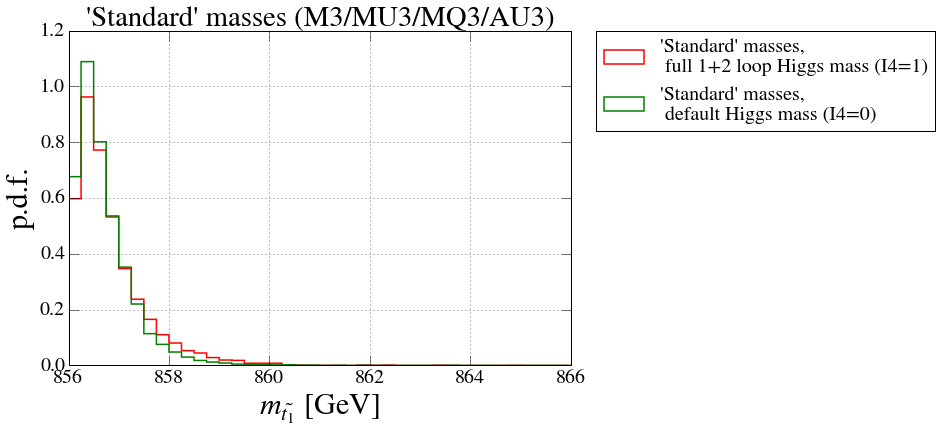

In [219]:
plot_many_hists_compare("mstop1", [df_pass_all, df_defmass_pass_all], "'Standard' masses (M3/MU3/MQ3/AU3)", [titles_all[0], titles_all[1]], 
                        r"$m_{\tilde{t_1}}\ \mathrm{[GeV]}$", "p.d.f.", ["red","green"], range=[856,866],
                        normed=True, bins=40, alpha=1, logy=False, histtype="step", linewidth=1.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=20)

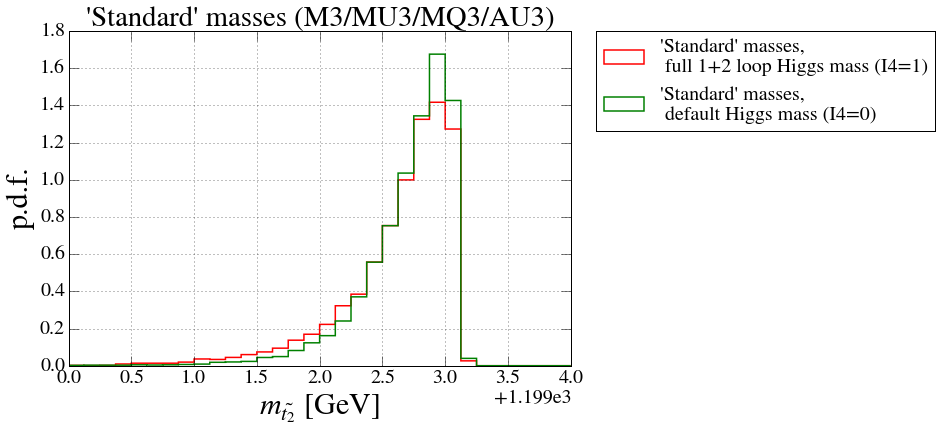

In [26]:
plot_many_hists_compare("mstop2", [df_pass_all, df_defmass_pass_all], "'Standard' masses (M3/MU3/MQ3/AU3)", [titles_all[0], titles_all[1]], 
                        r"$m_{\tilde{t_2}}\ \mathrm{[GeV]}$", "p.d.f.", ["red","green"], range=[1199, 1203],
                        normed=True, bins=32, alpha=1, logy=False, histtype="step", linewidth=1.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=20)

So there looks to be no major difference between the stop mass distributions for the different Higgs mass loops, although the full 1+2 loop scenario prefers a slightly heavier $\tilde{t}_1$ and lighter $\tilde{t}_2$ when compared with the 'default' Higgs mass.

Let us look at stop masses for various SUSY masses:

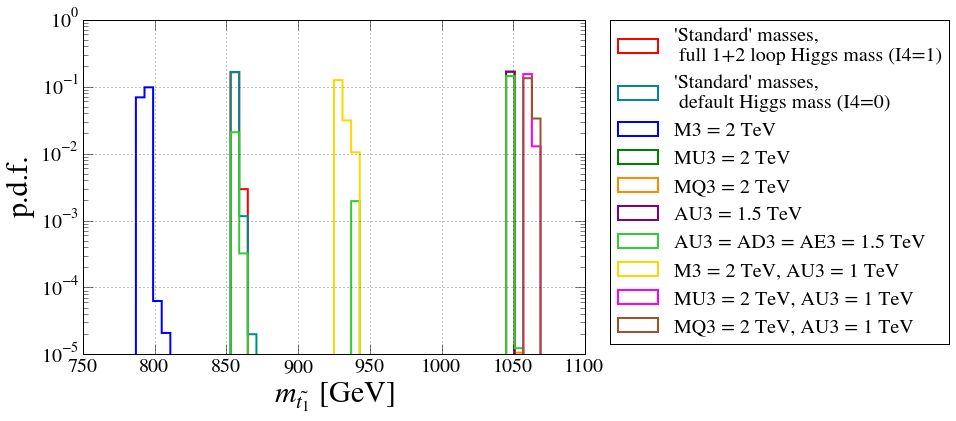

In [42]:
axp = plot_many_hists_compare("mstop1", dfs_all[:], "", titles_all[:], 
                              r"$m_{\tilde{t_1}}\ \mathrm{[GeV]}$", "p.d.f.",
                              colours_all[:], bins=50, range=[775,1075],
                              histtype="step", linewidth=2, normed=True, logy=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=20)

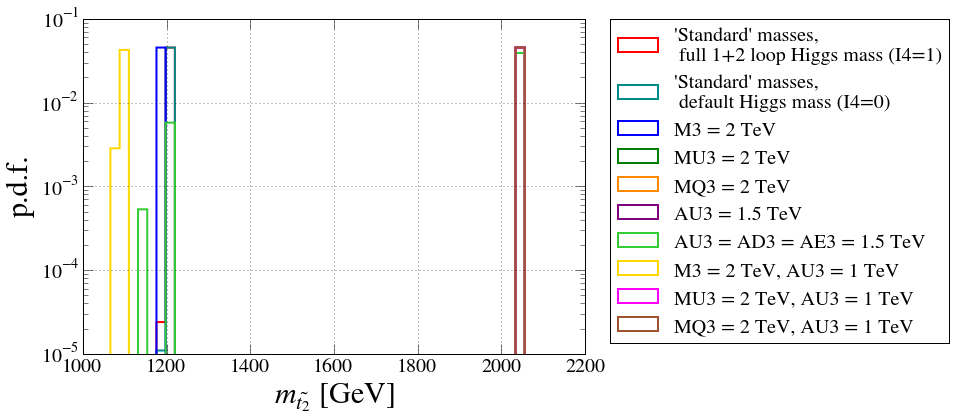

In [43]:
axp = plot_many_hists_compare("mstop2", dfs_all[:], "", titles_all[:], 
                              r"$m_{\tilde{t_2}}\ \mathrm{[GeV]}$", "p.d.f.",
                              colours_all[:], bins=50, range=[1000,2100],
                              histtype="step", linewidth=2, normed=True, logy=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=20)

(<matplotlib.figure.Figure at 0x18a80a250>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1be4a7f10>,
         <matplotlib.axes._subplots.AxesSubplot object at 0x1c0586f10>]], dtype=object))

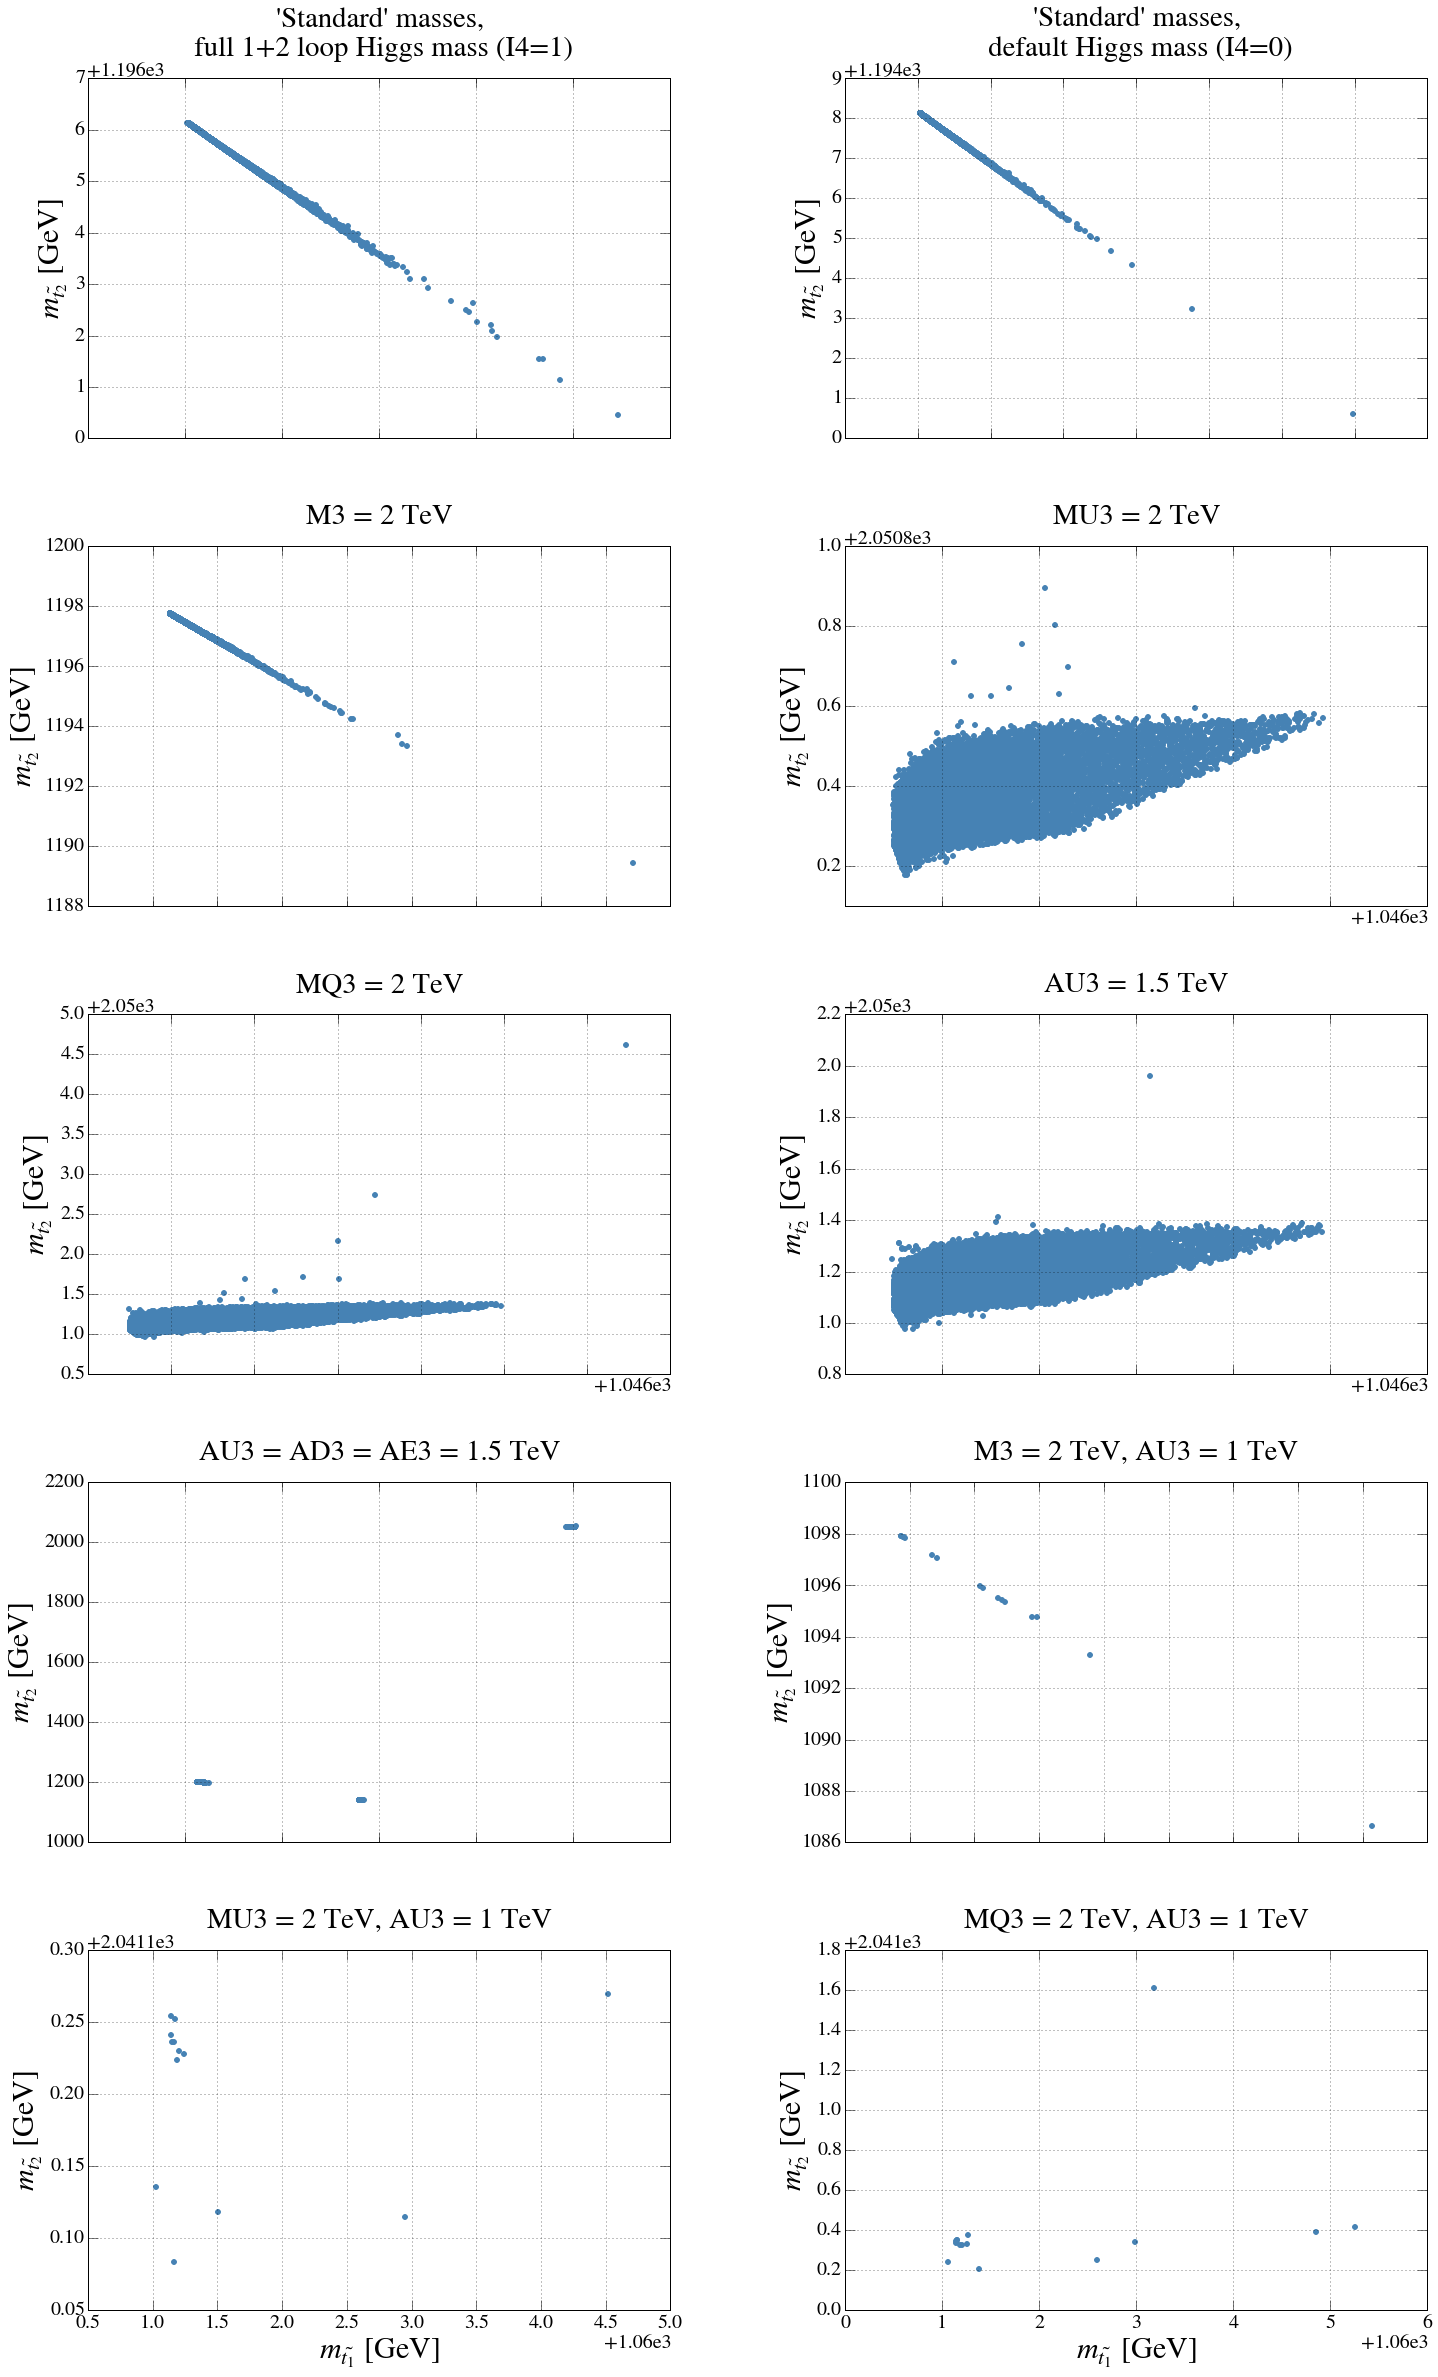

In [32]:
plot_many_scatters("mstop1", "mstop2", dfs_all, titles_all, 
                   r"$m_{\tilde{t_1}}\ \mathrm{[GeV]}$", r"$m_{\tilde{t_2}}\ \mathrm{[GeV]}$",color="steelblue")

Plotting all datasets together:

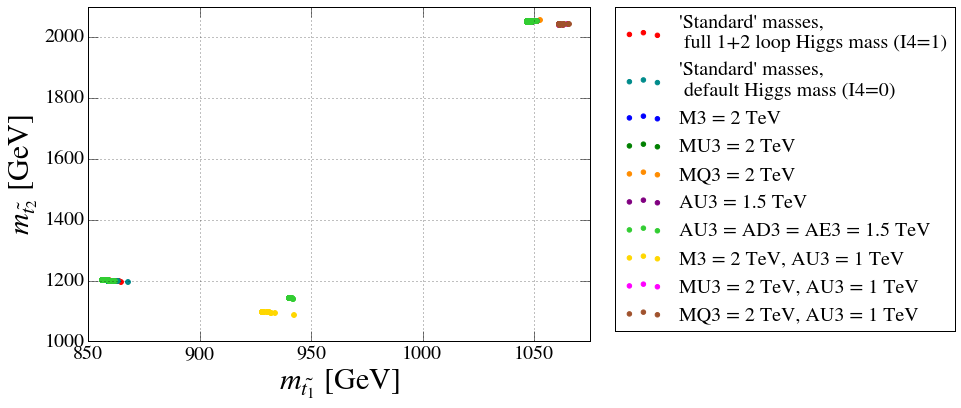

In [27]:
axp = plot_many_scatters_compare("mstop1", "mstop2", dfs_all[:6]+dfs_all[6:], "", titles_all[:6]+titles_all[6:], 
                           r"$m_{\tilde{t_1}}\ \mathrm{[GeV]}$", r"$m_{\tilde{t_2}}\ \mathrm{[GeV]}$", 
                           colours_all[:6]+colours_all[6:], alpha=1)
axp.set_xlim([850, 1075])
axp.set_ylim([1000, 2100])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=20)

Although hard to see details, the overall point is that we can cover a large range of stop masses - $m_{\tilde{t_1}}$ varies from 805 to 1050 GeV, and $m_{\tilde{t_2}}$ varies from 1.1 to 2.1 TeV.

#Sbottom masses 

We can repeat the exercise looking at sbottom masses now (since the stop and sbottom masses are most important in the Higgs loop calculations)

In [27]:
for df, title in izip([df_pass_all, df_defmass_pass_all], [titles_all[0], titles_all[1]]):
    print title, "\n", df.loc[:,['msbottom1','msbottom2']].describe()

'Standard' masses,
 full 1+2 loop Higgs mass (I4=1) 
          msbottom1     msbottom2
count  19038.000000  19038.000000
mean    1036.210625   1039.643665
std        1.239484      1.237000
min     1029.897830   1038.550310
25%     1035.837742   1038.760495
50%     1036.645400   1039.205740
75%     1037.101945   1039.986590
max     1037.286510   1045.904520
'Standard' masses,
 default Higgs mass (I4=0) 
          msbottom1     msbottom2
count  16650.000000  16650.000000
mean    1036.336898   1039.524699
std        1.186603      1.185242
min     1030.274600   1038.549270
25%     1036.062870   1038.709960
50%     1036.795420   1039.063140
75%     1037.153660   1039.788970
max     1037.286500   1045.536020


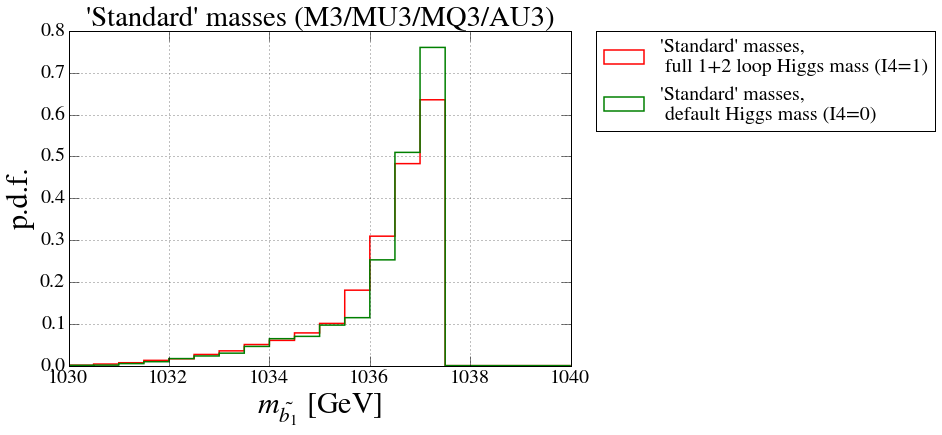

In [28]:
plot_many_hists_compare("msbottom1", [df_pass_all, df_defmass_pass_all], "'Standard' masses (M3/MU3/MQ3/AU3)", [titles_all[0], titles_all[1]], 
                        r"$m_{\tilde{b_1}}\ \mathrm{[GeV]}$", "p.d.f.", ["red","green"], range=[1030,1040],
                        normed=True, bins=20, alpha=1, logy=False, histtype="step", linewidth=1.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=20)

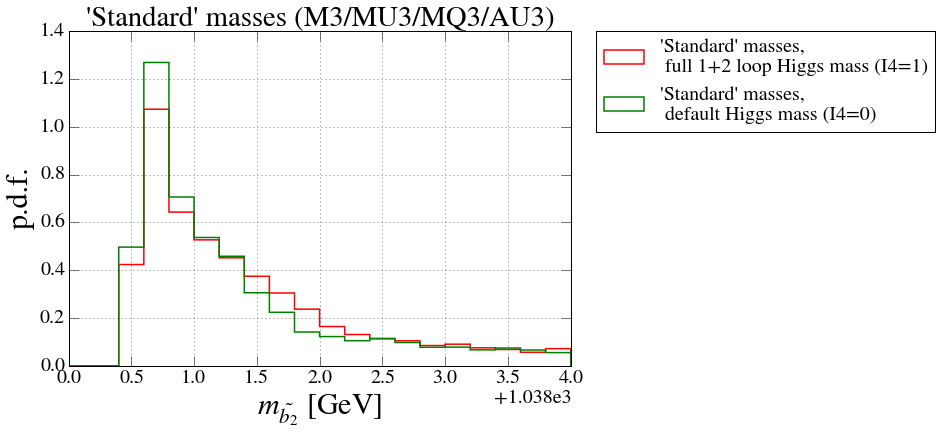

In [29]:
plot_many_hists_compare("msbottom2", [df_pass_all, df_defmass_pass_all], "'Standard' masses (M3/MU3/MQ3/AU3)", [titles_all[0], titles_all[1]], 
                        r"$m_{\tilde{b_2}}\ \mathrm{[GeV]}$", "p.d.f.", ["red","green"], range=[1038,1042],
                        normed=True, bins=20, alpha=1, logy=False, histtype="step", linewidth=1.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=20)

So we can see that, again, there are no major differences, although the full 1+2 loop scenario (I4 = 1) prefers a slightly lighter $m_{\tilde{b_1}}$ and heavier $m_{\tilde{b_2}}$ in comparision with the default Higgs mass scenario (I4 = 0).

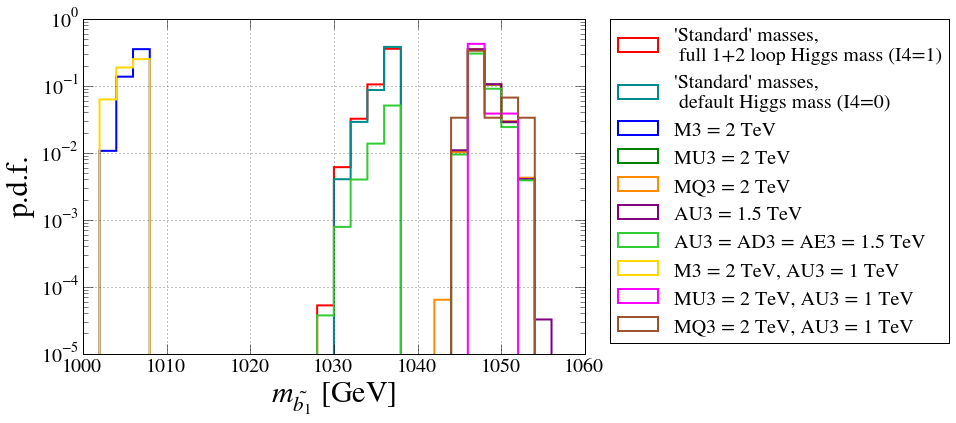

In [39]:
axp = plot_many_hists_compare("msbottom1", dfs_all[:], "", titles_all[:], 
                              r"$m_{\tilde{b_1}}\ \mathrm{[GeV]}$", "p.d.f.",
                              colours_all[:], bins=30, range=[1000,1060],
                              histtype="step", linewidth=2, normed=True, logy=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=20)

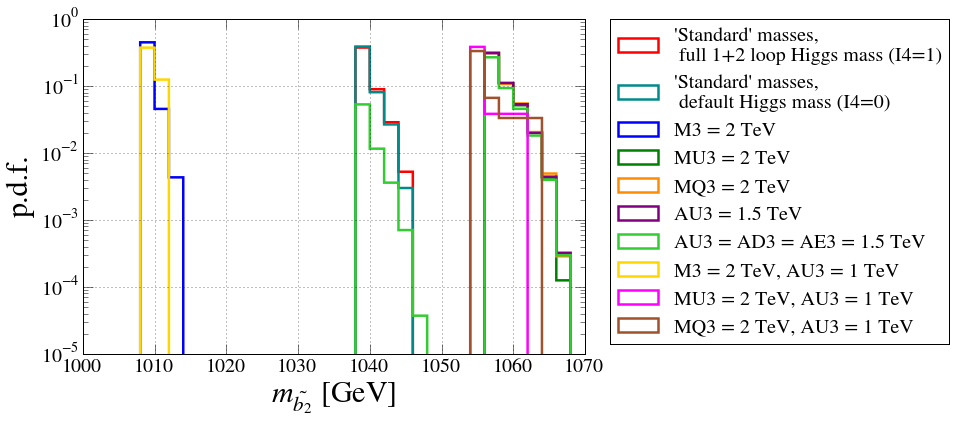

In [40]:
axp = plot_many_hists_compare("msbottom2", dfs_all[:], "", titles_all[:], 
                              r"$m_{\tilde{b_2}}\ \mathrm{[GeV]}$", "p.d.f.",
                              colours_all[:], bins=35, range=[1000, 1070],
                              histtype="step", linewidth=2.5, normed=True, logy=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=20)

# Anomalous muon magnetic moment

We can see below that, with the exception of M3 = 2 TeV, all the other mass choices have a large fraction of parameter points within the $\pm 2 \sigma$ boundary for $\Delta a_{\mu}$.

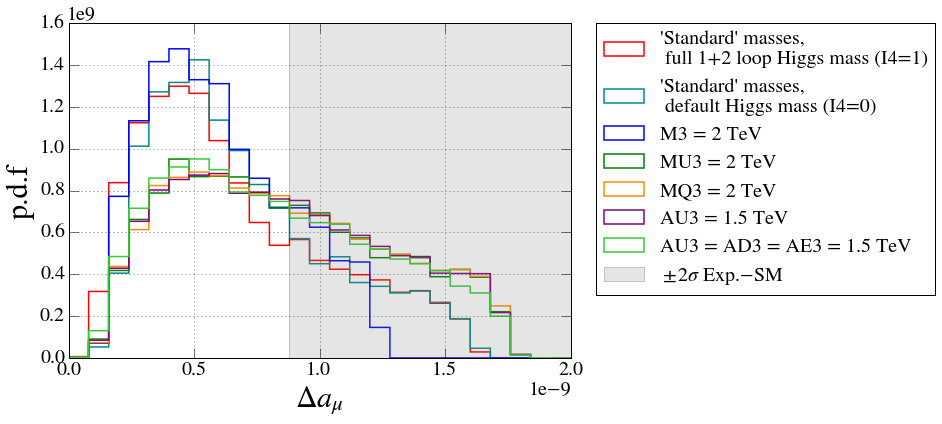

In [30]:
axp = plot_many_hists_compare("Del_a_mu", dfs_all[:-3], "", titles_all[:-3], 
                              r"$\Delta a_{\mu}$", "p.d.f",
                              colours_all[:-3], bins=25, range=[0,2E-9], 
                              histtype="step", linewidth=1.5, normed=True, linestyle="solid")
axp.add_patch(
    patches.Rectangle((8.77306222E-10, axp.get_ylim()[0]), 
                      (4.61144414E-09)-(8.77306222E-10), axp.get_ylim()[1],
                      alpha=0.2, label="$\pm 2\sigma$ Exp.-SM", facecolor="grey")
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=20)

#Relic density, $\Omega h^2$ 

We can see from the plot below that varying these masses does not change the value of $\Omega h^2$ appreciably

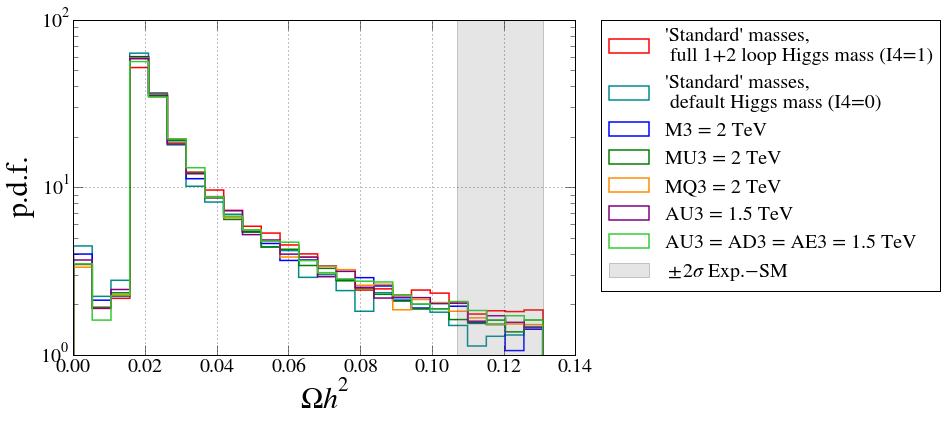

In [31]:
axp = plot_many_hists_compare("omega", dfs_all[:-3], "", titles_all[:-3], 
                              r"$\Omega h^2$", "p.d.f.",
                              colours_all[:-3], bins=25, 
                              histtype="step", linewidth=1.5, normed=True, logy=True)
axp.add_patch(
    patches.Rectangle((0.107, axp.get_ylim()[0]), 
                      0.131-0.107, axp.get_ylim()[1],
                      alpha=0.2, label="$\pm 2\sigma$ Exp.-SM", facecolor="grey")
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=20)

We can also consider the effect of what happens when you enable the lower bound requirement on $\Omega h^2$ (0.107), and its affect on masses and param space.

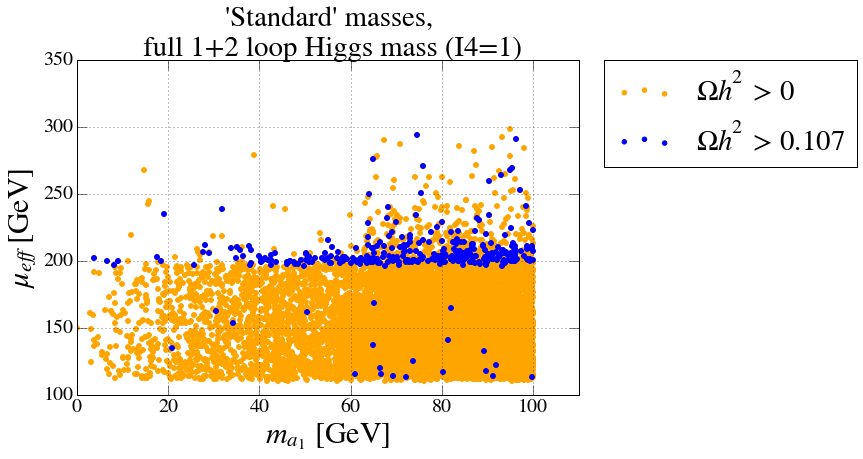

In [278]:
axmu = plot_many_scatters_compare("ma1", "mueff", [df_pass_all, df_pass_all[df_pass_all.omega>0.107]], titles_all[0], 
                           [r"$\Omega h^2 >\ 0$", r"$\Omega h^2 >\ 0.107$"],
                           r"$m_{a_1}\ \mathrm{[GeV]}$", r"$\mu_{eff}\ \mathrm{[GeV]}$", ["orange", "blue"], alpha=1)
axmu.set_xlim([0,110])

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Interestingly, by requiring a lower bound on $\Omega h^2$ we limit $\mu_{eff}$ to a much smaller part of phase space. The majority of points occupy $\mu_{eff}\sim200\mathrm{~GeV}$, with a much smaller occupancy at $\mu_{eff}\sim110\mathrm{~GeV}$ for $m_{a_1} > 60 \mathrm{~GeV}$.

# Replicating Bomark/Moretti/et al plots

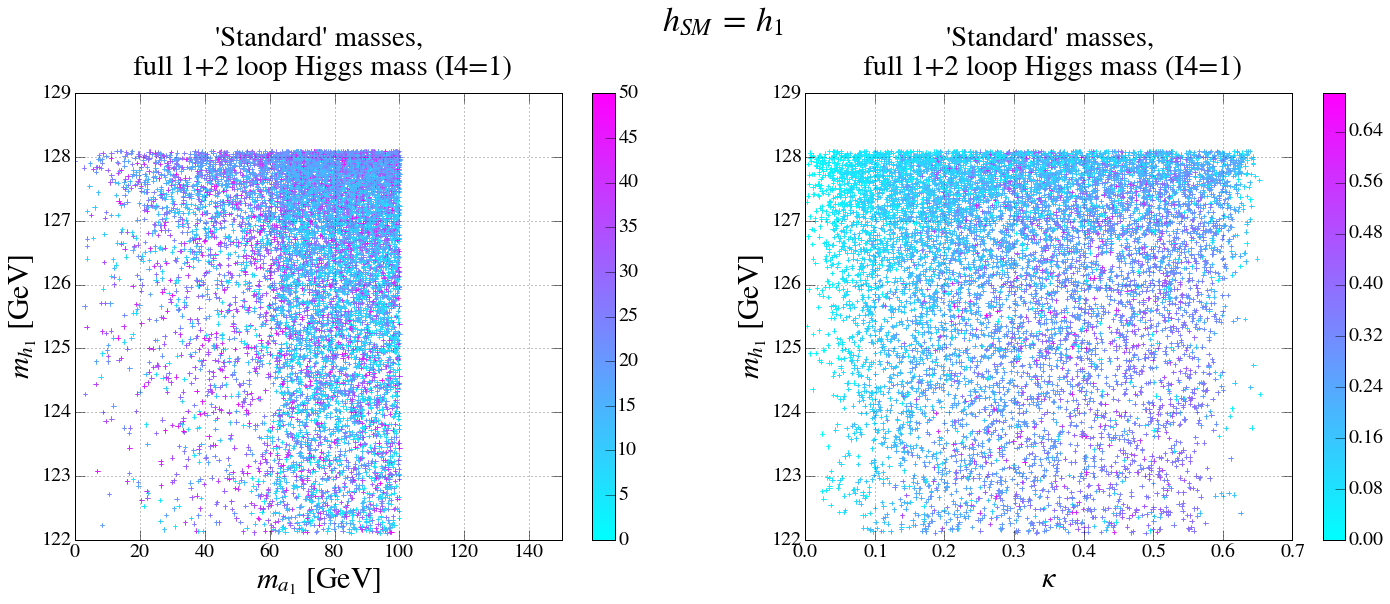

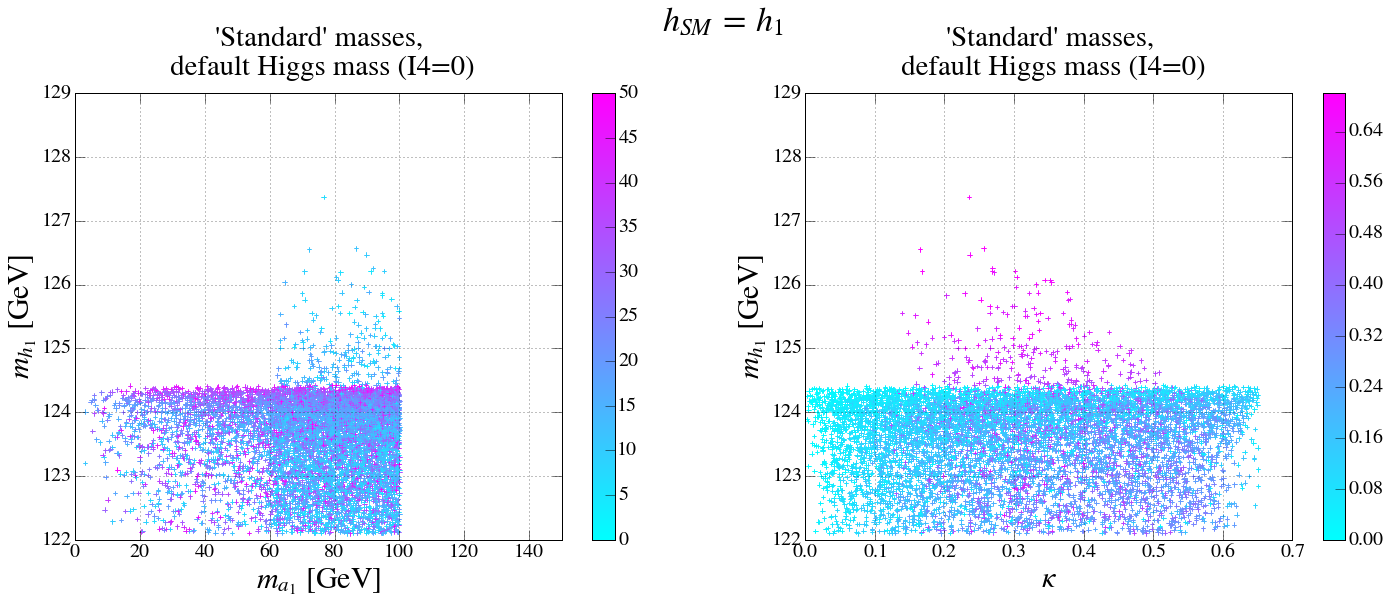

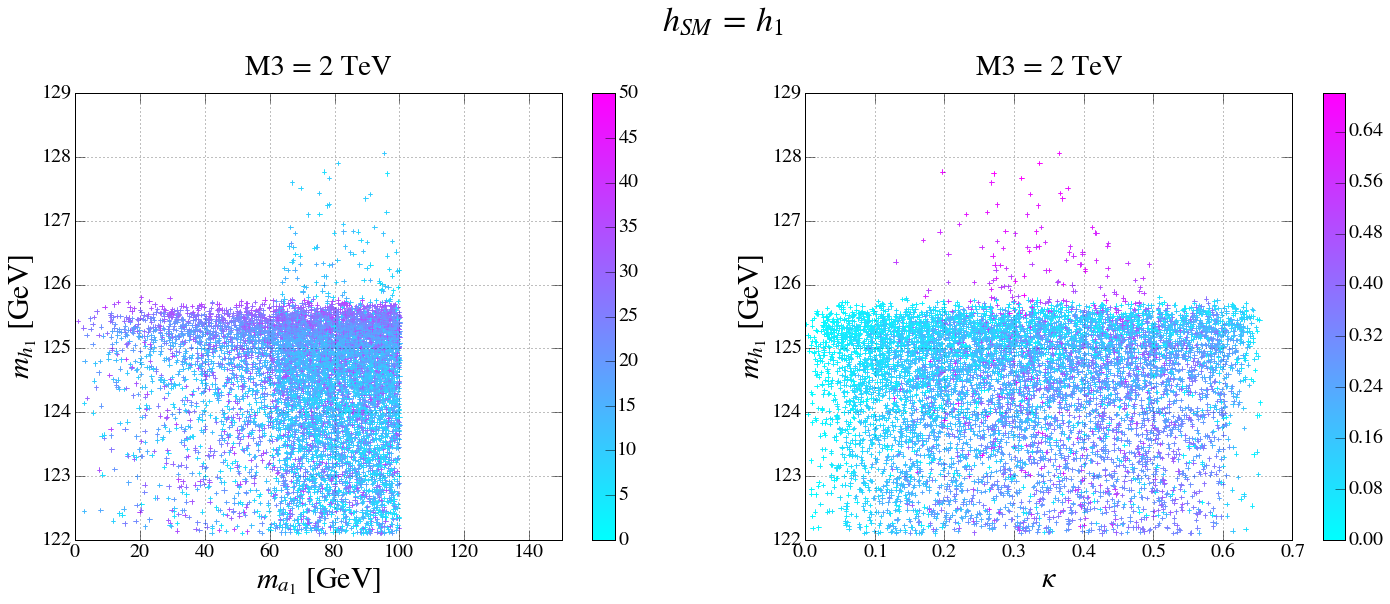

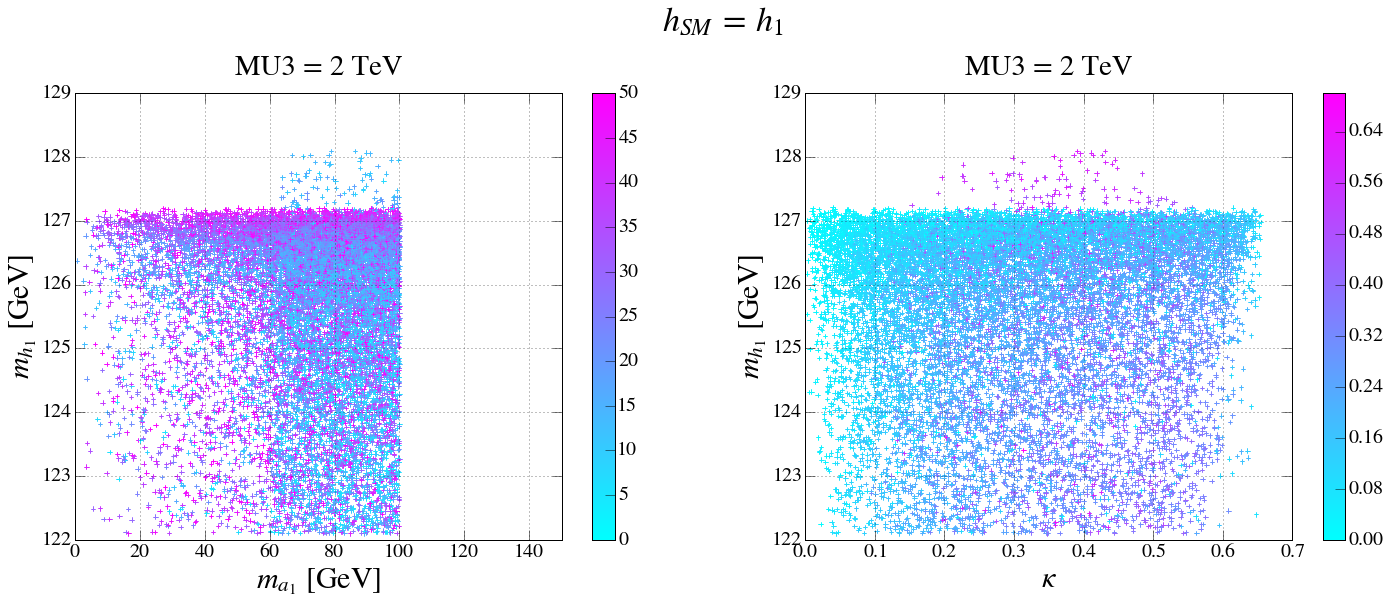

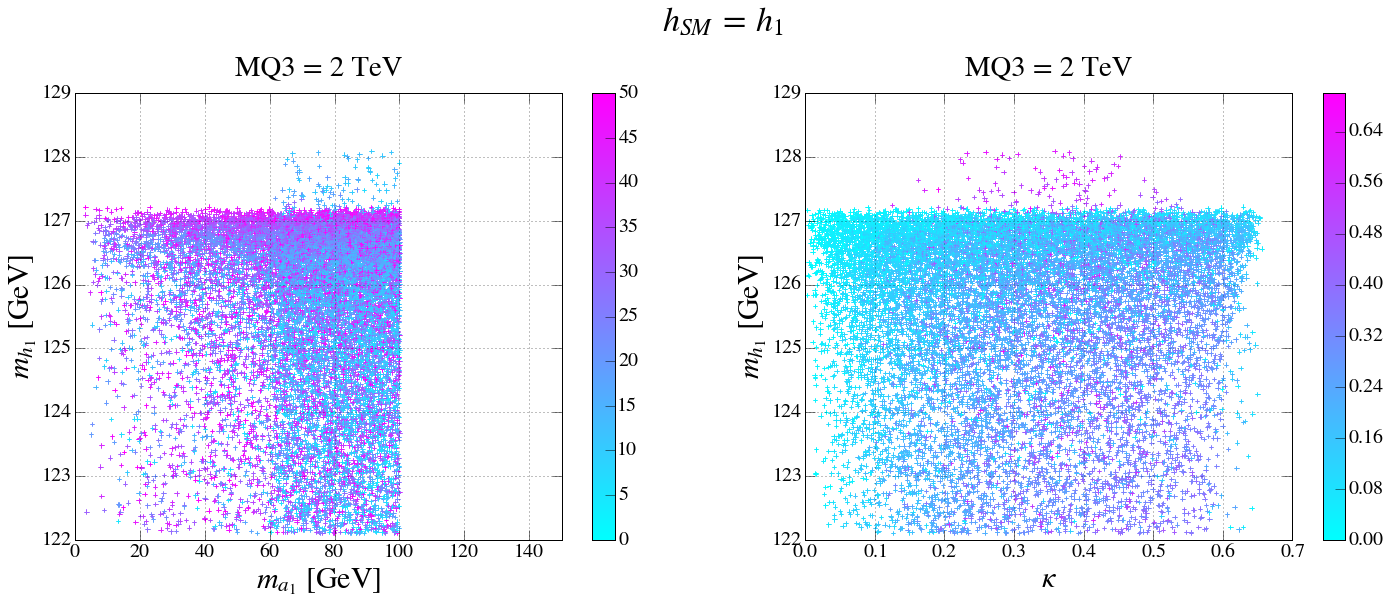

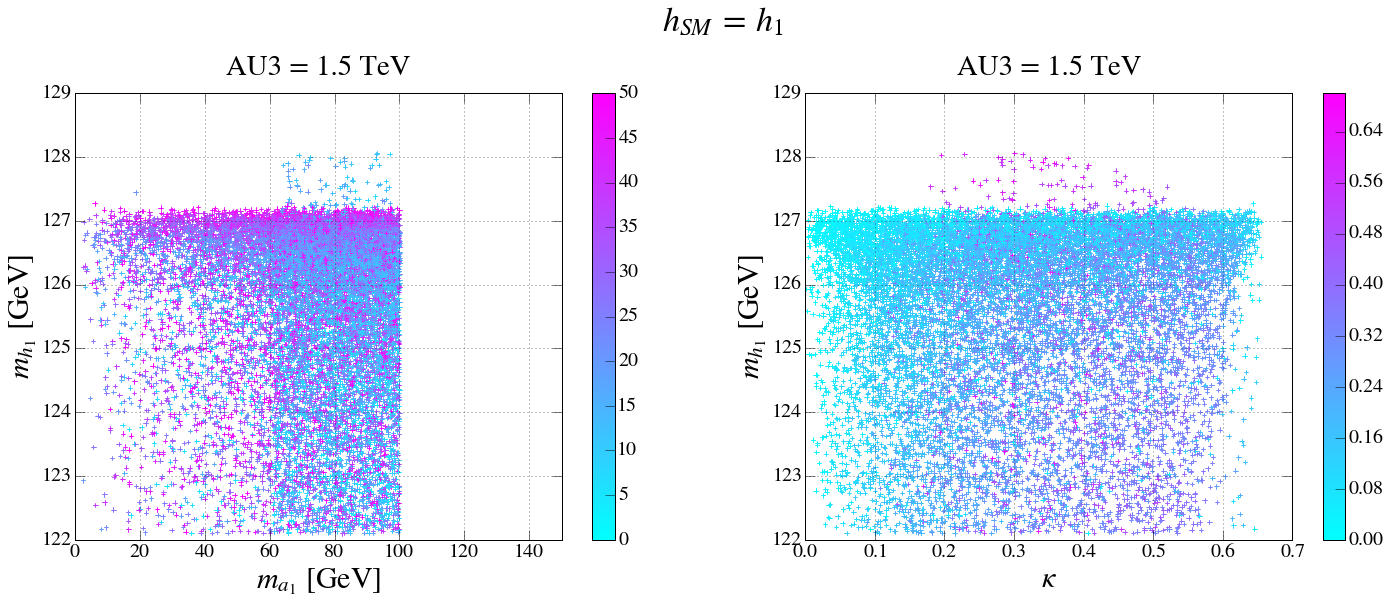

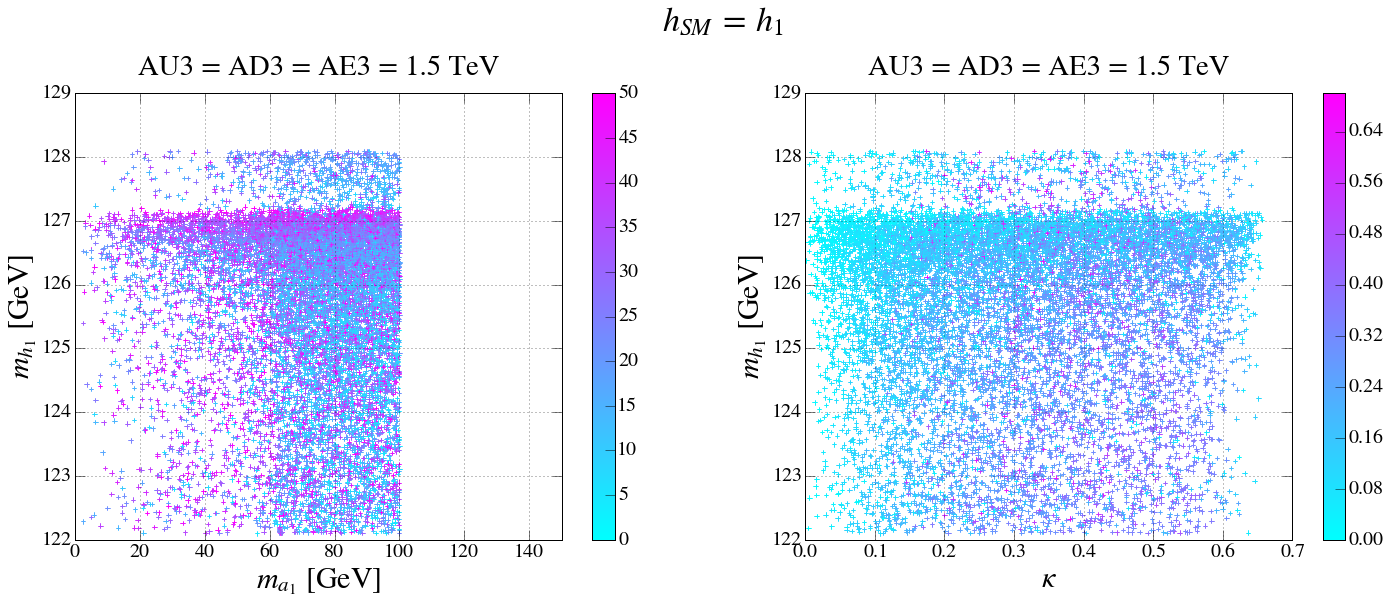

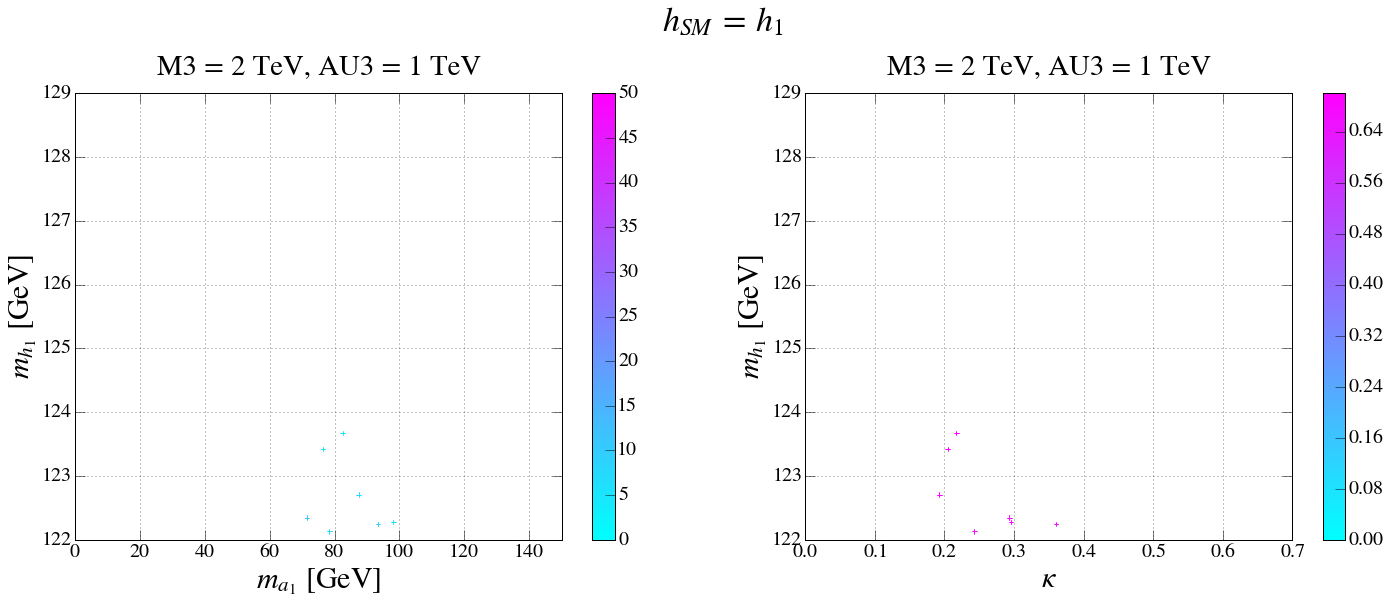

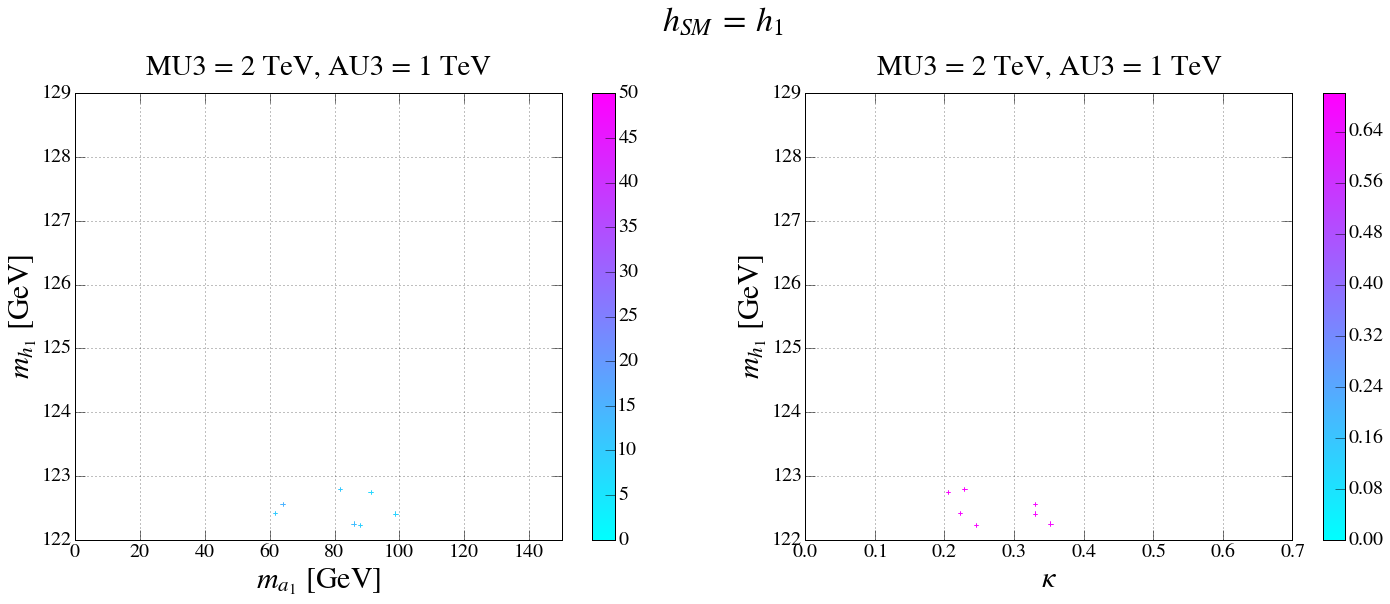

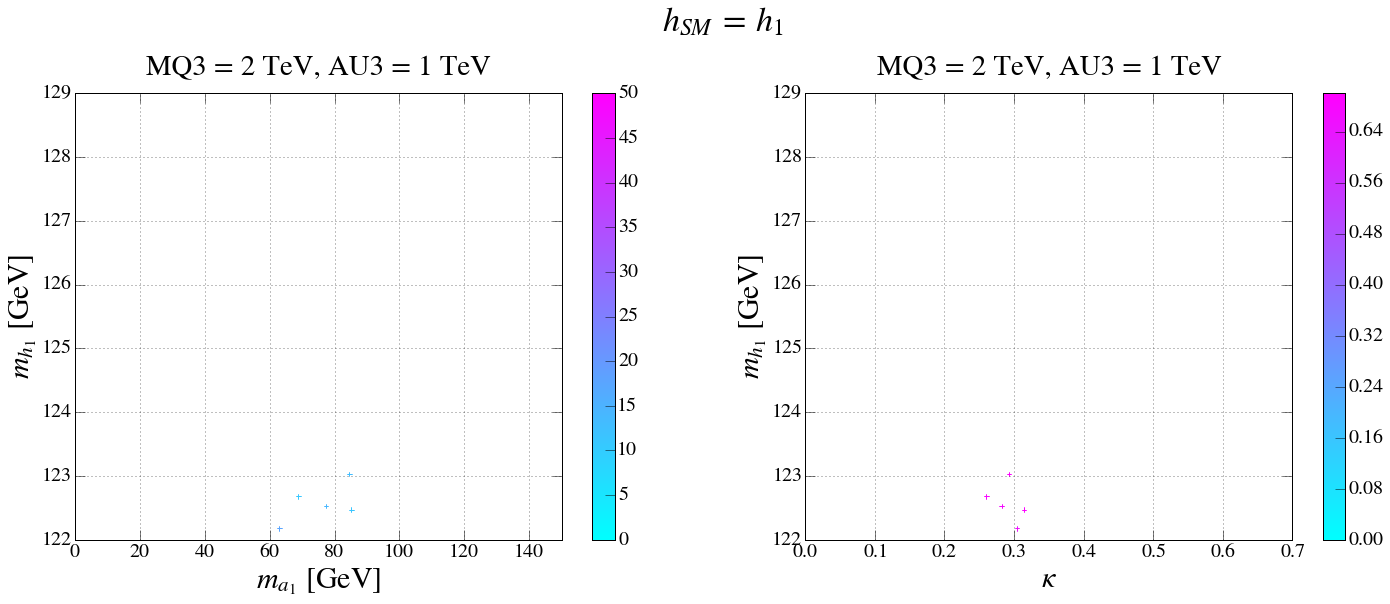

In [293]:
for df, title in izip(dfs_all, titles_all):
    paper_compare_plot1(df[(df.mh1>122.1)&(df.mh1<128.1)], title)

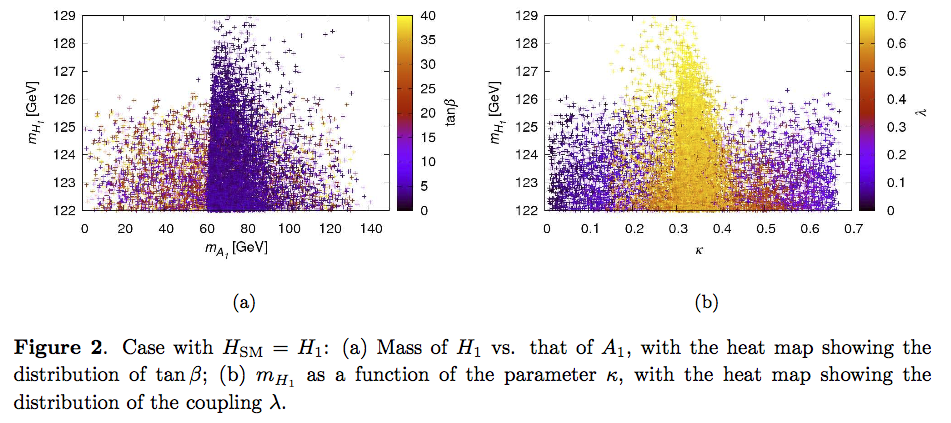

In [61]:
from IPython.display import Image

fig = Image(filename=('figures/bm_fig2.png'))
fig

One big concern is why the plots for I4=1 (full 1+2 loop Higgs mass) and I4=0 ('default' Higgs mass) look so different - in particular, why it seems that a larger $m_{h_1}$ is preferred in the former, and a smaller in the latter scenario.

Let us look at the failing constraints for those points with larger $m_{h_1}$, with $\tan \beta > 25$, or with $\lambda$ < 0.4.

In [46]:
print "Number of points in I4=0 sample with mh1 = 124.5 - 128.1 with tan(beta) > 25 and no constraints:", len(df_defmass_orig[(df_defmass_orig.mh1>124.5)&(df_defmass_orig.mh1<128.1)&(df_defmass_orig.tgbeta>25)].index)

Number of points in I4=0 sample with mh1 = 124.5 - 128.1 with tan(beta) > 25 and no constraints: 312


In [47]:
print "Number of points in I4=0 sample with mh1 = 124.5 - 128.1 with lambda < 0.4 and no constraints:", len(df_defmass_orig[(df_defmass_orig.mh1>124.5)&(df_defmass_orig.mh1<128.1)&(df_defmass_orig.lambda_<0.4)].index)

Number of points in I4=0 sample with mh1 = 124.5 - 128.1 with lambda < 0.4 and no constraints: 2


Note the very small number of points in this regions _prioir_ to passing any constraints. Evidently they did not even pass the mh1^2>1 or ma1^2>1 requirement when generating points.

In [ ]:
# plot_many_hists_compare("tgbeta", [df_defmass_h1SM,], "title", ["a","b"], r"$\tan \beta$", "p.d.f.", ["green", "red"], normed=True)

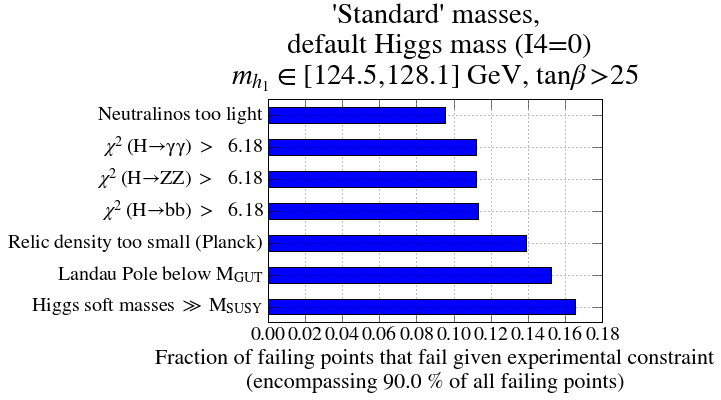

In [225]:
plot_constraints(df_defmass_orig[(df_defmass_orig.mh1>124.5)&(df_defmass_orig.mh1<128.1)&(df_defmass_orig.tgbeta>25)], 
                 titles_all[1]+"\n"+r"$m_{h_1} \in\ [124.5, 128.1]$ GeV, $\tan \beta > 25$")

Note that there is not a huge difference in the fraction failing each constraint, so there is not 1 'killer' constraint.

Another interest is why there is an absence of points in the plots with M3/MU3 = 2 TeV, in the region where $m_{a_1} < 60\text{GeV}$ and  $m_{h_1} \in [127, 128]$ GeV. Let's look at which experimental constraints those points fail.

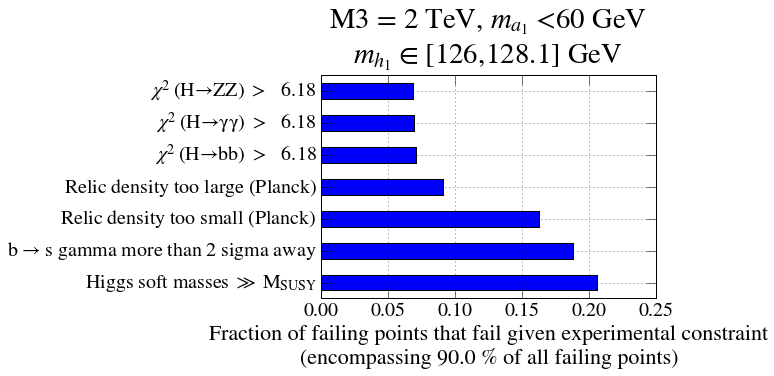

In [236]:
plot_constraints(df_M3_2000_orig[(df_M3_2000_orig.ma1<60)&(df_M3_2000_orig.mh1>126)&(df_M3_2000_orig.mh1<128.1)], 
                 "M3 = 2 TeV, $m_{a_1} < 60$ GeV" "\n" r"$m_{h_1} \in\ [126, 128.1]$ GeV")

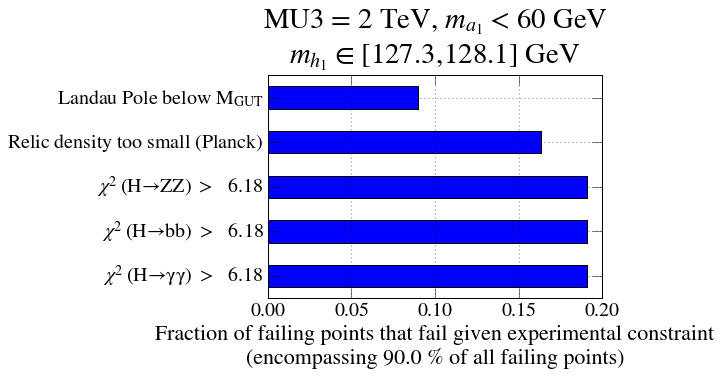

In [235]:
plot_constraints(df_MU3_2000_orig[(df_MU3_2000_orig.ma1<60)&(df_MU3_2000_orig.mh1>127.3)&(df_MU3_2000_orig.mh1<128.1)], 
                 "MU3 = 2 TeV, $m_{a_1} <\ 60$ GeV" "\n" r"$m_{h_1} \in\ [127.3, 128.1]$ GeV")

We can see that:

- **for M3 = 2 TeV**: points fail due to a variety of circumstances - mianly due to the Higgs soft mass exceeding $M_{susy}$, and $b\to s \gamma$ rate mismatch. In addition, points fail match the experimentally measured Higgs decay rate.

- **for MU3 = 2 TeV**: points fail mainly due to the Higgs decay rate failing to match experimental measurements


What about that sharp edge in $m_{h_1}$? Let's look at larger $m_{h_1}$ with large $\tan \beta$.

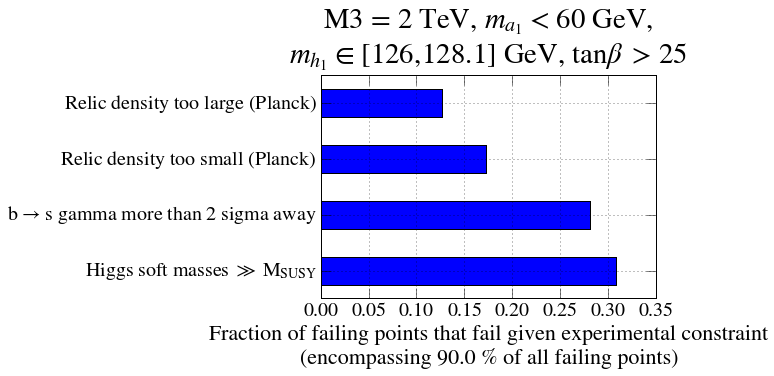

In [234]:
plot_constraints(df_M3_2000_orig[(df_M3_2000_orig.mh1>126)&(df_M3_2000_orig.mh1<128.1)&(df_M3_2000_orig.tgbeta>25)], 
                 r"M3 = 2 TeV, $m_{a_1} <\ 60$ GeV," "\n" r"$m_{h_1} \in\ [126, 128.1]$ GeV, $\tan \beta\ >\ 25$")

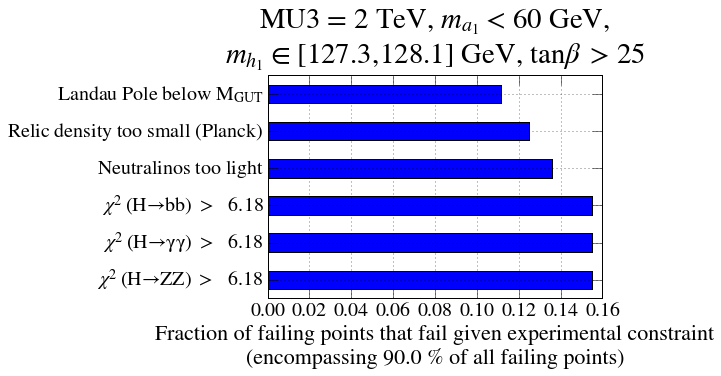

In [45]:
plot_constraints(df_MU3_2000_orig[(df_MU3_2000_orig.mh1>127.3)&(df_MU3_2000_orig.mh1<128.1)&(df_MU3_2000_orig.tgbeta>25)], 
                 r"MU3 = 2 TeV, $m_{a_1} <\ 60$ GeV," "\n" r"$m_{h_1} \in\ [127.3, 128.1]$ GeV, $\tan \beta\ >\ 25$")

Again, there is no common constraint that is failing to be satisfied. 

We can also plot the range of input params for the I4 = 0 and I4 = 1 scenarios in the region $124.5 < m_{h_1} < 128.1\ \mathrm{GeV}, \tan \beta > 25$ (i.e., where we have no points in the I4 = 0 scenario) to see if there is some big difference. All histograms are normalised to unity to allow shape comparisons.

We will consider distributions for I4 = 1 dataset (with and without exp. constraints) and I4 = 0 (without exp. constraints). The only constraints enforced on the "without exp. constraint" points are:

- $m_{a_1} > 100$ GeV

- $M_{H1}^2<1$

- $M_{A1}^2<1$

- $M_{H^\pm}^2<1$

In [241]:
higgs_lower = 124.5
tgbeta_lower = 25
bins = 35
title = r"$%g < m_{h_1} < 128.1\ \mathrm{GeV},\ \tan \beta\ >\ %g$" % (higgs_lower, tgbeta_lower)
# post constraints
df_1_post = df_pass_all[(df_pass_all.mh1>higgs_lower) & (df_pass_all.tgbeta>tgbeta_lower) & (df_pass_all.mh1<128.1)]
df_2_post = df_defmass_pass_all[(df_defmass_pass_all.mh1>higgs_lower) & (df_defmass_pass_all.tgbeta>tgbeta_lower) & (df_defmass_pass_all.mh1 < 128.1)]
# pre constraints
df_1_pre = df_orig[(df_orig.mh1>higgs_lower) & (df_orig.tgbeta>tgbeta_lower) & (df_orig.mh1 < 128.1)]
df_2_pre = df_defmass_orig[(df_defmass_orig.mh1>higgs_lower) & (df_defmass_orig.tgbeta>tgbeta_lower) & (df_defmass_orig.mh1<128.1)]

dfs = [df_1_pre, df_1_post, df_2_pre]
cols = ["red", "blue", "green"]
labels=["I4=1 (without exp. constraints)", "I4=1 (with exp. constraints)", "I4=0 (without exp. constraints)"]

# print "I4 = 1: Number of points pre constraints:", len(df_1_pre.index), "I4 = 0: Number of points pre constraints:", len(df_2_pre.index)

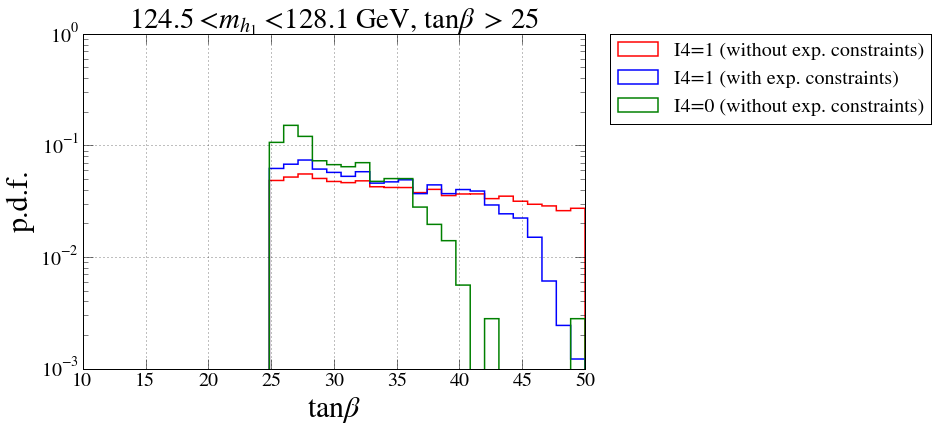

In [227]:
a1 = plot_many_hists_compare("tgbeta", 
                        dfs, 
                        title, 
                        labels, r"$\tan \beta$", "p.d.f.", cols, bins=bins, range=[10,50],
                        histtype="step", linewidth=1.5, normed=True, logy=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=20)

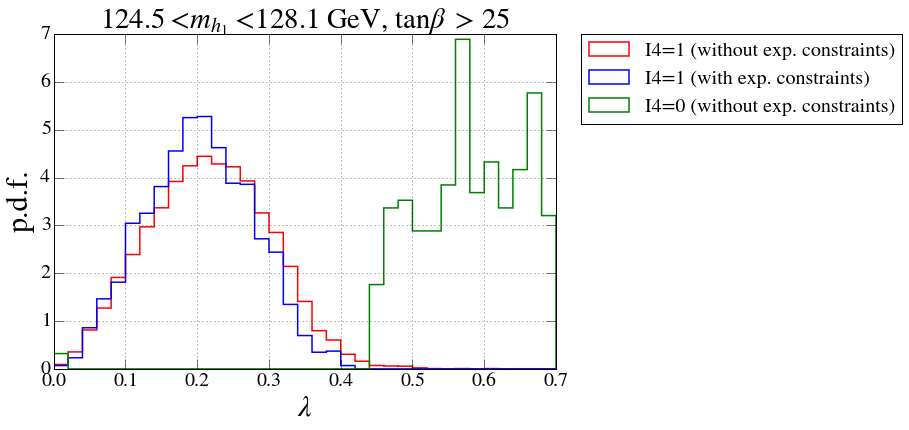

In [228]:
a2 = plot_many_hists_compare("lambda_", 
                        dfs, 
                        title,
                         labels, r"$\lambda$", "p.d.f.", cols, bins=bins, range=[0, 0.7],
                        histtype="step", linewidth=1.5, normed=True, logy=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=20)

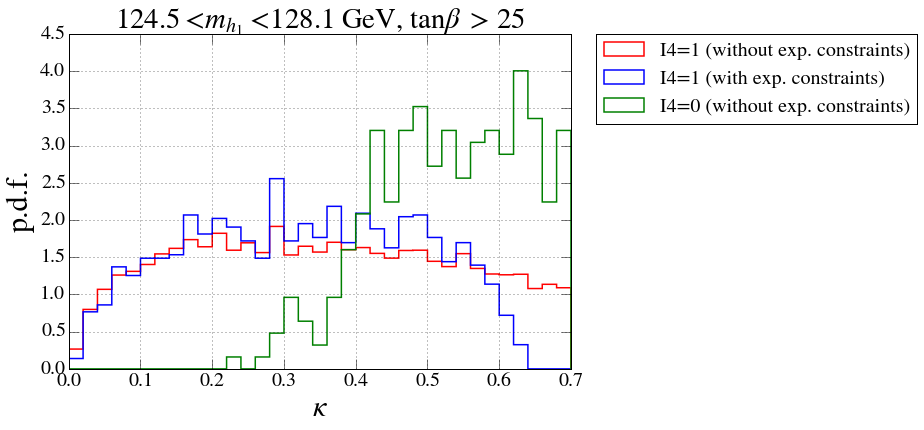

In [229]:
plot_many_hists_compare("kappa", 
                        dfs, 
                        title,
                        labels, r"$\kappa$", "p.d.f.", cols, bins=bins, range=[0,0.7],
                        histtype="step", linewidth=1.5, normed=True, logy=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=20)

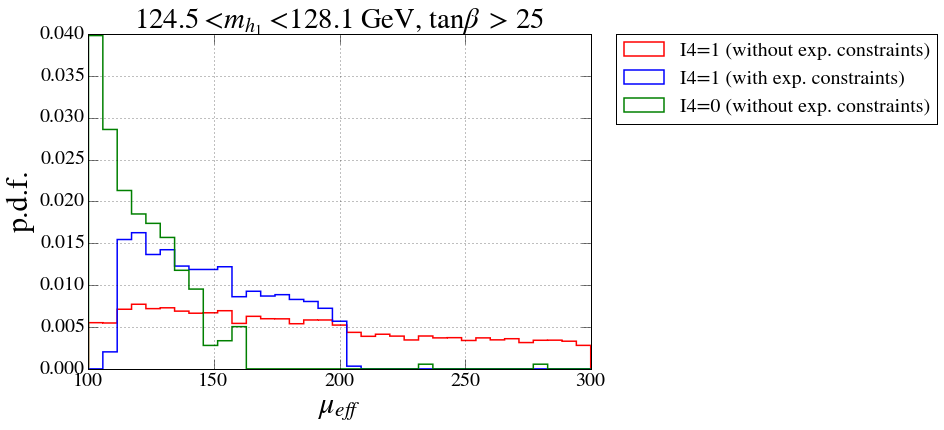

In [230]:
plot_many_hists_compare("mueff", 
                        dfs, 
                        title,
                        labels, r"$\mu_{eff}$", "p.d.f.", cols, bins=bins, range=[100,300],
                        histtype="step", linewidth=1.5, normed=True, logy=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=20)

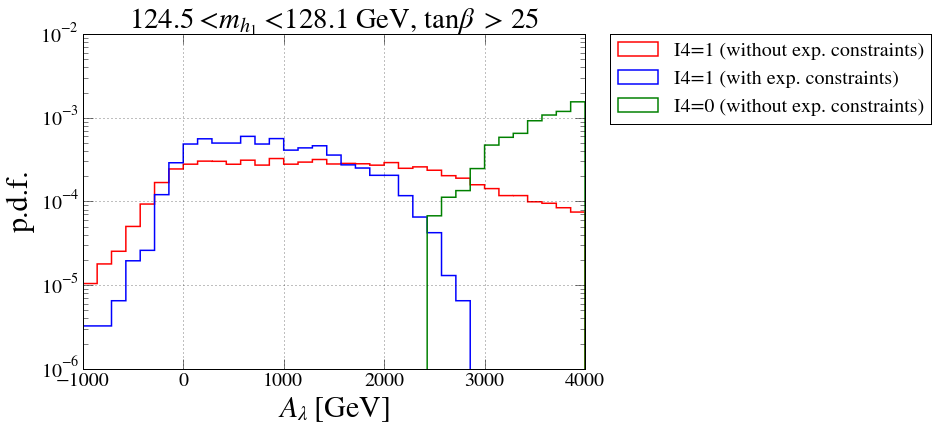

In [231]:
plot_many_hists_compare("alambda", 
                        dfs, 
                        title,
                        labels, r"$A_{\lambda}\ \mathrm{[GeV]}$", "p.d.f.", cols, bins=bins, range=[-1000,4000],
                        histtype="step", linewidth=1.5, normed=True, logy=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=20)

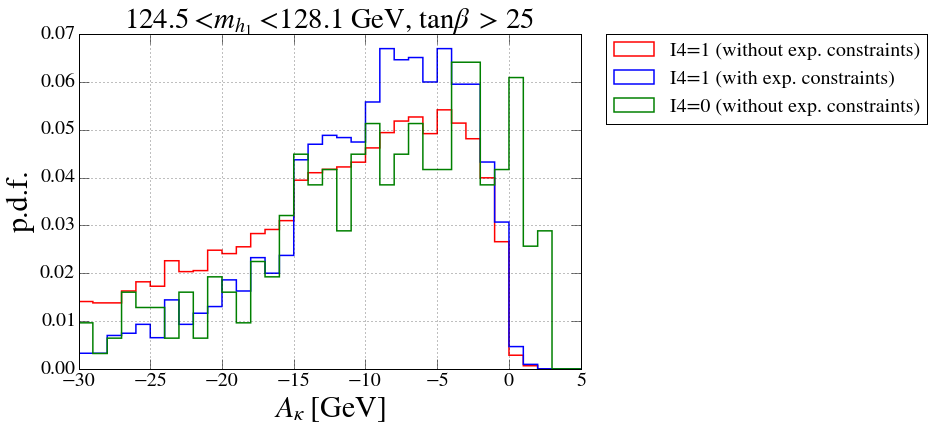

In [232]:
plot_many_hists_compare("akappa", 
                        dfs, 
                        title,
                        labels, r"$A_{\kappa}\ \mathrm{[GeV]}$", "p.d.f.", cols, bins=bins, range=[-30, 5],
                        histtype="step", linewidth=1.5, normed=True, logy=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=20)

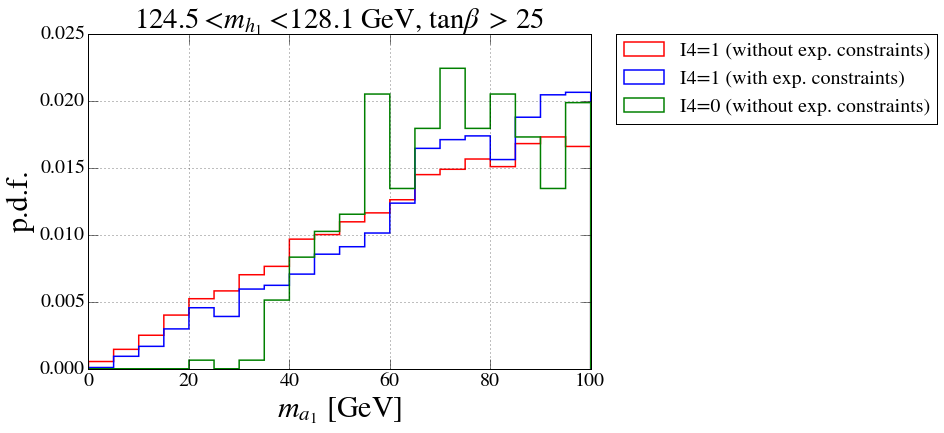

In [242]:
plot_many_hists_compare("ma1", 
                        dfs, 
                        title,
                        labels, r"$m_{a_1}\ \mathrm{[GeV]}$", "p.d.f.", cols, bins=20, range=[0, 100],
                        histtype="step", linewidth=1.5, normed=True, logy=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=20)

Note that the input scan range was exactly the same for both the I4=0 and I4=1 datasets. What is interesting it that even **before** checking against experimental constraints there are large differences in the phase space covered (compare red with green). Some points of interest:

- I4 = 0 has virtually no points with $\tan \beta > 40$

- $\lambda \sim 0.4$ is a divide between I4 = 1 ($\lambda < 0.4$) and I4 = 0 ($\lambda > 0.4$)

- Very few points in I4 = 0 have $\kappa < 0.4$, but I4 = 1 has a wide range of $\kappa$

- I4 = 0 has virtually no poitns with $\mu_{eff} > 150$ GeV

- I4 = 0 only has $A_{\lambda} > 2500$ GeV

- $A_{\kappa}$ is similar for both scenarios$

- I4 = 0 tends to favour larger $m_{a_1}$ - almost no points with $m_{a_1} < 35$

The only constraints enforced on the "without exp. constraint" points are:

- $124.5 < m_{h_1} < 128.1$ GeV

- $\tan \beta > 25$

- $m_{a_1} > 100$ GeV

- $m_{H1}^2<1$

- $m_{A1}^2<1$

- $m_{H^\pm}^2<1$



More questions than answers?

- Why such a difference *before* exp. constraints?

- In this corner of phase space, why is a light $a_1$ very rare?

- What is responsible for the lack of points?